In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv("datasets/life_expectancy.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
df.value_counts()

Country      Year  Status      Life expectancy   Adult Mortality  infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  GDP          Population   thinness  1-19 years   thinness 5-9 years  Income composition of resources  Schooling
Afghanistan  2000  Developing  54.8              321.0            88             0.01     10.424960               62.0         6532      12.2   122                 24.0   8.20               24.0         0.1        114.560000   293756.0    2.3                    2.5                  0.338                            5.5          1
Nicaragua    2005  Developing  71.2              194.0            3              3.70     218.571618              86.0         0         46.4   4                   87.0   6.11               86.0         0.3        1175.116225  5379328.0   2.0                    1.9                  0.592                            11.0         1
Niger       

In [9]:
df["Status"].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

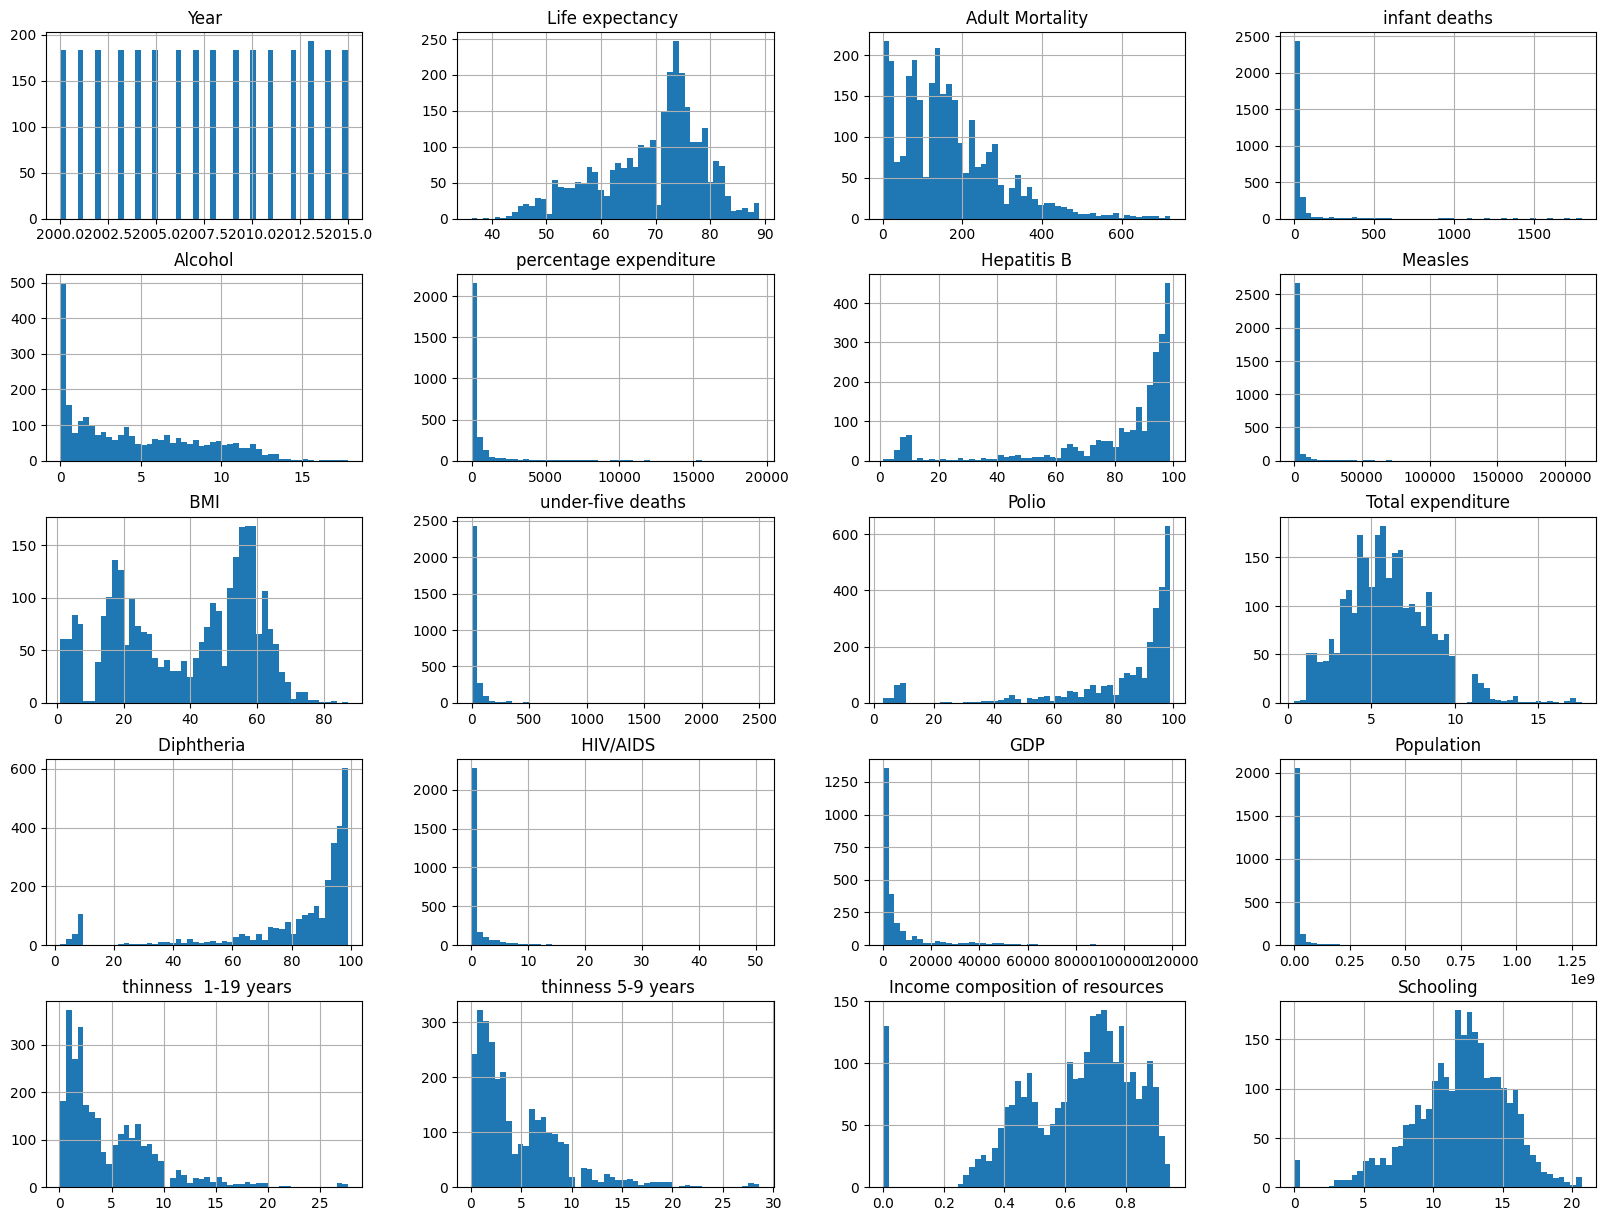

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# creating test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
df["country_status"] = np.where(df["Status"] == "Developing", 1, 2)

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["country_status"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


In [26]:
strat_test_set["country_status"].value_counts() / len(strat_test_set)

country_status
1    0.826531
2    0.173469
Name: count, dtype: float64

In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("country_status", axis=1, inplace=True)

In [28]:
a = "11010"

print(a.count("101"))
print(a.count("010"))

1
1
